In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

sns.set(style="whitegrid")

In [3]:

# =============================
# LOAD MULTIPLE HEART DATASETS
# =============================
print("Loading heart disease dataset...")

heart_files = [
    "heart.csv",
    "Cardiovascular_Disease_Dataset.csv"
]

heart_frames = []

heart_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                  'restecg', 'thalach', 'exang', 'oldpeak',
                  'slope', 'ca', 'thal', 'num']

for file in heart_files:
    try:
        df = pd.read_csv(file)
        print(f"Loaded: {file}, shape={df.shape}")

        df.columns = df.columns.str.strip()

        for col in heart_features:
            if col not in df.columns:
                df[col] = np.nan

        df = df[heart_features]
        heart_frames.append(df)

    except:
        print(f"Failed to load: {file}")

heart_df = pd.concat(heart_frames, ignore_index=True)

heart_df = heart_df.replace("?", np.nan)
heart_df['ca'] = pd.to_numeric(heart_df['ca'], errors='coerce')
heart_df['thal'] = pd.to_numeric(heart_df['thal'], errors='coerce')

for col in heart_features[:-1]:
    heart_df[col] = heart_df[col].fillna(heart_df[col].median())

# convert num → binary
y_heart = (heart_df['num'].astype(float) > 0).astype(int)
X_heart = heart_df[heart_features[:-1]]

X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    X_heart, y_heart, test_size=0.2, random_state=42
)

heart_scaler = StandardScaler()
X_heart_train_scaled = heart_scaler.fit_transform(X_heart_train)
X_heart_test_scaled = heart_scaler.transform(X_heart_test)

print("Training heart disease model...")
heart_model = RandomForestClassifier(n_estimators=100, random_state=42)
heart_model.fit(X_heart_train_scaled, y_heart_train)

heart_score = heart_model.score(X_heart_test_scaled, y_heart_test)
print(f"Heart disease model accuracy: {heart_score:.4f}")

joblib.dump(heart_model, 'heart_model.pkl')
joblib.dump(heart_scaler, 'heart_scaler.pkl')
print("Heart disease model saved!")

Loading heart disease dataset...
Loaded: heart.csv, shape=(303, 14)
Loaded: Cardiovascular_Disease_Dataset.csv, shape=(1000, 14)
Training heart disease model...
Heart disease model accuracy: 0.9579
Heart disease model saved!


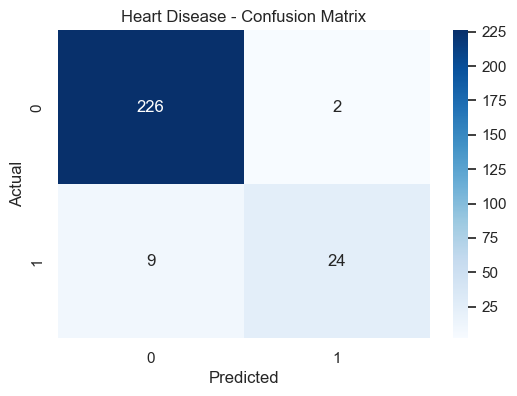

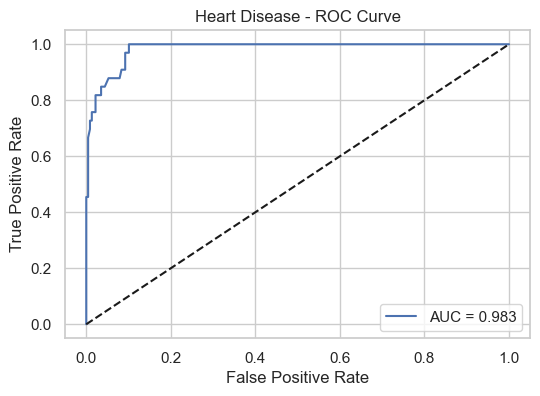

C:\Users\Satya\AppData\Local\Temp\ipykernel_43000\1382210213.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_model.feature_importances_, y=heart_features[:-1], palette="Blues_r")


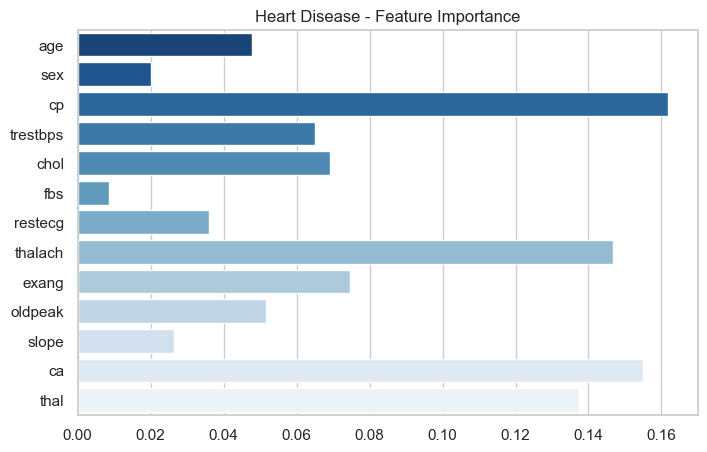

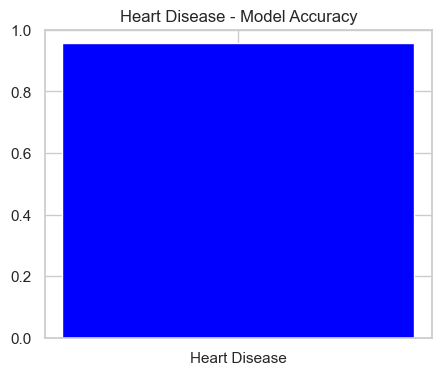

In [4]:

# IMPORTANT HEART GRAPHS
# =============================

# Confusion Matrix
y_pred_heart = heart_model.predict(X_heart_test_scaled)
cm_heart = confusion_matrix(y_heart_test, y_pred_heart)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_heart, annot=True, cmap="Blues", fmt="d")
plt.title("Heart Disease - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob_heart = heart_model.predict_proba(X_heart_test_scaled)[:, 1]
fpr_heart, tpr_heart, _ = roc_curve(y_heart_test, y_prob_heart)
roc_auc_heart = auc(fpr_heart, tpr_heart)

plt.figure(figsize=(6, 4))
plt.plot(fpr_heart, tpr_heart, label=f"AUC = {roc_auc_heart:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Heart Disease - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=heart_model.feature_importances_, y=heart_features[:-1], palette="Blues_r")
plt.title("Heart Disease - Feature Importance")
plt.show()

# Accuracy Bar
plt.figure(figsize=(5, 4))
plt.bar(["Heart Disease"], [heart_score], color="blue")
plt.ylim(0, 1)
plt.title("Heart Disease - Model Accuracy")
plt.show()

In [5]:

# LOAD MULTIPLE DIABETES FILES
# ======================================
print("\nLoading diabetes dataset...")

diabetes_files = [
    "diabetes.csv",
    "diabetes_all_2016.csv",
    "Dataset of Diabetes .csv"
]

diabetes_frames = []

diabetes_features = ['Pregnancies', 'Glucose', 'BloodPressure',
                     'SkinThickness', 'Insulin', 'BMI',
                     'DiabetesPedigreeFunction', 'Age', 'Outcome']

for file in diabetes_files:
    try:
        df = pd.read_csv(file)
        print(f"Loaded: {file}, shape={df.shape}")

        df.columns = df.columns.str.strip()

        rename_map = {}
        for col in df.columns:
            c = col.lower()
            if "preg" in c:
                rename_map[col] = "Pregnancies"
            elif "glucose" in c:
                rename_map[col] = "Glucose"
            elif ("bloodpressure" in c) or c == "bp":
                rename_map[col] = "BloodPressure"
            elif "thick" in c:
                rename_map[col] = "SkinThickness"
            elif "insulin" in c:
                rename_map[col] = "Insulin"
            elif c == "bmi":
                rename_map[col] = "BMI"
            elif "pedigree" in c:
                rename_map[col] = "DiabetesPedigreeFunction"
            elif c == "age":
                rename_map[col] = "Age"
            elif "outcome" in c or "diabetic" in c or "class" in c:
                rename_map[col] = "Outcome"

        df = df.rename(columns=rename_map)

        for col in diabetes_features:
            if col not in df.columns:
                df[col] = np.nan

        df = df[diabetes_features]
        diabetes_frames.append(df)

    except:
        print(f"Failed: {file}")

diabetes_df = pd.concat(diabetes_frames, ignore_index=True)

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_df[col] = diabetes_df[col].replace(0, np.nan)

for col in diabetes_features[:-1]:
    diabetes_df[col] = diabetes_df[col].fillna(diabetes_df[col].median())

# SAFELY CLEAN OUTCOME
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype(str).str.strip().str.lower()

positive_values = ['yes', 'y', 'positive', 'pos', 'true', 't', '1']
negative_values = ['no', 'n', 'negative', 'neg', 'false', 'f', '0', '', 'nan', 'none']

diabetes_df['Outcome'] = diabetes_df['Outcome'].replace(positive_values, 1)
diabetes_df['Outcome'] = diabetes_df['Outcome'].replace(negative_values, 0)

diabetes_df['Outcome'] = pd.to_numeric(diabetes_df['Outcome'], errors='coerce').fillna(0).astype(int)

X_diabetes = diabetes_df[diabetes_features[:-1]]
y_diabetes = diabetes_df['Outcome']

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

diabetes_scaler = StandardScaler()
X_diabetes_train_scaled = diabetes_scaler.fit_transform(X_diabetes_train)
X_diabetes_test_scaled = diabetes_scaler.transform(X_diabetes_test)

print("Training diabetes model...")
diabetes_model = RandomForestClassifier(n_estimators=100, random_state=42)
diabetes_model.fit(X_diabetes_train_scaled, y_diabetes_train)

diabetes_score = diabetes_model.score(X_diabetes_test_scaled, y_diabetes_test)
print(f"Diabetes model accuracy: {diabetes_score:.4f}")

joblib.dump(diabetes_model, 'diabetes_model.pkl')
joblib.dump(diabetes_scaler, 'diabetes_scaler.pkl')

print("Diabetes model saved!")
print("\nAll models trained and saved successfully!")


Loading diabetes dataset...
Loaded: diabetes.csv, shape=(768, 9)
Loaded: diabetes_all_2016.csv, shape=(390, 10)
Loaded: Dataset of Diabetes .csv, shape=(1000, 14)
Training diabetes model...
Diabetes model accuracy: 0.9005
Diabetes model saved!

All models trained and saved successfully!


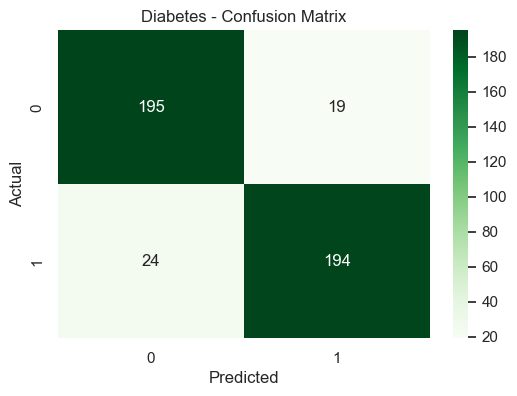

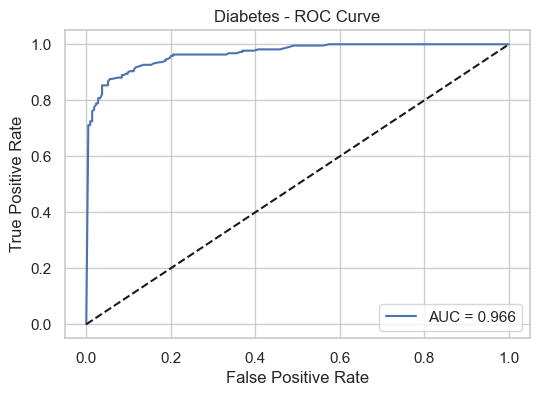

C:\Users\Satya\AppData\Local\Temp\ipykernel_43000\1609471200.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_model.feature_importances_, y=diabetes_features[:-1], palette="Greens_r")


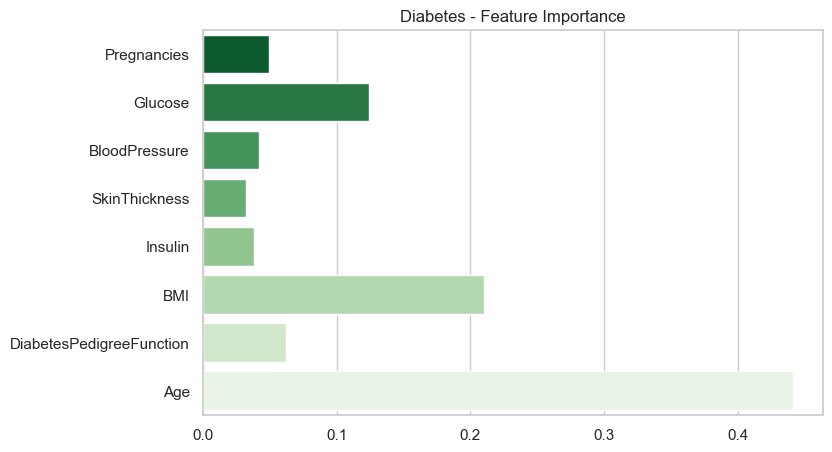

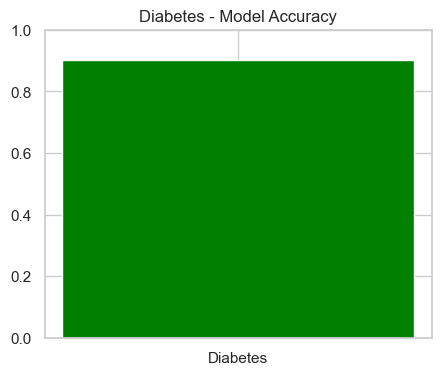

In [6]:

# IMPORTANT DIABETES GRAPHS
# =============================

# Confusion Matrix
y_pred_diabetes = diabetes_model.predict(X_diabetes_test_scaled)
cm_diabetes = confusion_matrix(y_diabetes_test, y_pred_diabetes)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_diabetes, annot=True, cmap="Greens", fmt="d")
plt.title("Diabetes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC
y_prob_diab = diabetes_model.predict_proba(X_diabetes_test_scaled)[:, 1]
fpr_d, tpr_d, _ = roc_curve(y_diabetes_test, y_prob_diab)
roc_auc_d = auc(fpr_d, tpr_d)

plt.figure(figsize=(6, 4))
plt.plot(fpr_d, tpr_d, label=f"AUC = {roc_auc_d:.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Diabetes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=diabetes_model.feature_importances_, y=diabetes_features[:-1], palette="Greens_r")
plt.title("Diabetes - Feature Importance")
plt.show()

# Accuracy Bar
plt.figure(figsize=(5, 4))
plt.bar(["Diabetes"], [diabetes_score], color="green")
plt.ylim(0, 1)
plt.title("Diabetes - Model Accuracy")
plt.show()
